# Simulación 1DOF de Dinámica del Cohete (Algoritmo MIT)
Santiago Arroyo Lozano

## Plantemiento del problema
Vamos a implementar el algoritmo explicado en el Artículo del MIT sobre la
dinámica de un cohete unidimensional.
Graficaremos la altura, velocidad, aceleración y fuerzas con respecto al tiempo.

Las conclusiones estarán explicadas en el PDF adjunto con este programa

Parámetros para la simulación:

1. Diámetro del fuselaje: 2 in
2. Masa seca: 1kg
3. Coeficiente de Arrastre: Usar valor constante, investigarlo en internet y elegir uno a criterio del aspirante.
4. Densidad del aire en la CDMX y gravedad de la Tierra.
5. Curva de empuje: 150N por 2 seg. con flujo de masa: 150 g/s
6. Diferencial de tiempo a elección del aspirante

In [5]:
"""
@author Santiago Arroyo
@date 6/11/2021

Simulacion de cohete unidimensional
"""
import numpy as np
from math import pi
from collections import defaultdict

default_factory = (lambda: None)
      
# Definimos los diccionarios que nos ayudaran a graficar
grafica_peso = defaultdict(default_factory)
grafica_fuerza = defaultdict(default_factory)
grafica_altura = defaultdict(default_factory)
grafica_inercia = defaultdict(default_factory)
grafica_impulso = defaultdict(default_factory)
grafica_arrastre = defaultdict(default_factory)
grafica_velocidad = defaultdict(default_factory)
grafica_aceleracion = defaultdict(default_factory)

#Definimos nuestros datos iniciales
g = 9.807             # Gravedad
D = 0                 # Arrastre
m = 1                 # Masa en kg
F = 0                 # Fuerza en N
T = 150               # Thrust(Impulso) en N
p = 1.2               # Densidad del aire en CDMX
h = 0                 # Altura (inica con valor 0)
V = 0                 # velocidad (inica con valor 0)
C_D = 0.5             # Coeficiente de arrastre constante
delta_t = 0.2         # Tasa de cambio del tiempo
m_fuel = 0.15         # Flujo de masa (Combustible): 150 g/s
r = .0508/2           # Radio del fuselaje en metros, despues de pasarlo de pulgadas
A = pi*r**2           # Area de superficie en m. 

# Iniciamos con las iteraciones
for t in np.arange(0,10.2,delta_t):
    t = round(t,2) #Debemos redondear por problemas de Python con los números flotantes
    if t == 2.2:
        T = m_fuel= 0
    if V >= 0:
        F = -m*g-D+T
    else:
        F = -m*g+D-T
    a = F/m
    h = h + V*(t-(t-delta_t))
    m = m - m_fuel*delta_t
    I = 1/2*m*r**2 #Fórmula de momento de incercia de un cuerpo cilíndrico
    V = V + a*t
    W = m*g # Fórmula de peso en relacióna masa y gravedad
    D = round((1/2)*p*(V**2)*C_D*A, 2) #Debemos redondear a dos dígitos para evitar overlfow
    
    # Guardamos los valores en sus respectivos diccionarios
    grafica_peso[t] = W
    grafica_fuerza[t] = F
    grafica_altura[t] = h
    grafica_inercia[t] = I
    grafica_impulso[t] = T
    grafica_arrastre[t] = D
    grafica_velocidad[t] = V
    grafica_aceleracion[t] = a
    
    # Cuando la altura sea cero quiere decir que estamos en Tierra nuevamente, termina la simulación. 
    # En caso contrario seguimos
    if h <= 0 and t > 0.4:
        break

# Graficamos los resultados:

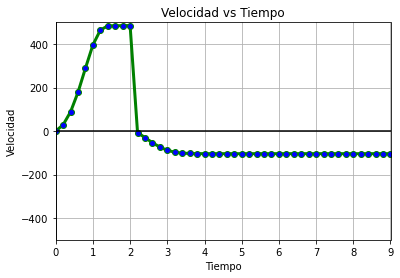

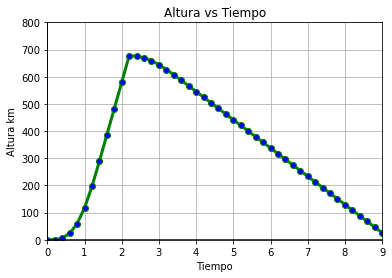

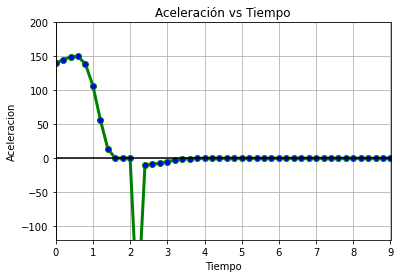

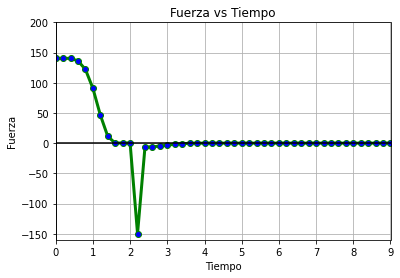

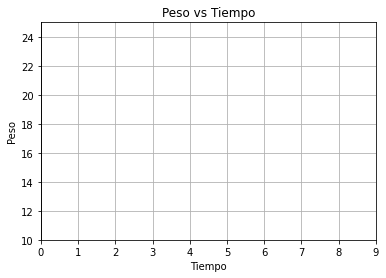

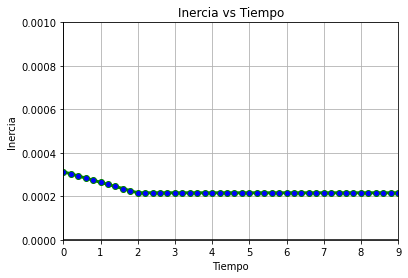

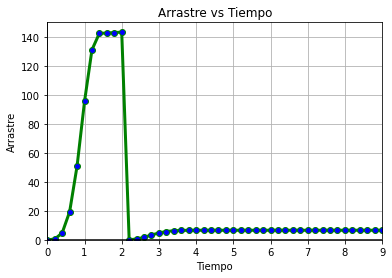

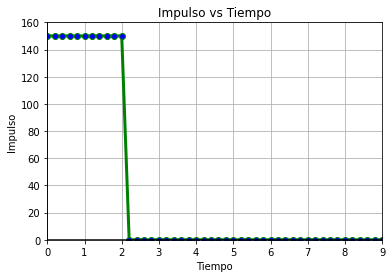

In [6]:
import matplotlib.pyplot as plt

# Grafica de velocidad
plt.plot(grafica_velocidad.keys(), grafica_velocidad.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(-500,500) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de altura
plt.plot(grafica_altura.keys(), grafica_altura.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(0,800) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.xlabel('Tiempo')
plt.ylabel('Altura km')
plt.title('Altura vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de aceleracion
plt.plot(grafica_aceleracion.keys(), grafica_aceleracion.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(-120,200) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.xlabel('Tiempo')
plt.ylabel('Aceleracion')
plt.title('Aceleración vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de fuerza
plt.plot(grafica_fuerza.keys(), grafica_fuerza.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(-160,200) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.xlabel('Tiempo')
plt.ylabel('Fuerza')
plt.title('Fuerza vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de peso
plt.plot(grafica_peso.keys(), grafica_peso.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(10,25) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.xlabel('Tiempo')
plt.ylabel('Peso')
plt.title('Peso vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de inercia
plt.plot(grafica_inercia.keys(), grafica_inercia.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(0,0.001) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.grid(True, which='both')
plt.xlabel('Tiempo')
plt.ylabel('Inercia')
plt.title('Inercia vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de arrastre
plt.plot(grafica_arrastre.keys(), grafica_arrastre.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(0,150) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.grid(True, which='both')
plt.xlabel('Tiempo')
plt.ylabel('Arrastre')
plt.title('Arrastre vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

# Grafica de impulso
plt.plot(grafica_impulso.keys(), grafica_impulso.values(), color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.ylim(0,160) # limites eje y
plt.xlim(0,9)  # limites eje x
plt.grid(True, which='both')
plt.xlabel('Tiempo')
plt.ylabel('Impulso')
plt.title('Impulso vs Tiempo')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


El valor final de $t$ es el tiempo total de la simulación

In [ ]:
t

8.8

: 

Adjunta un programa funcional (en el lenguaje que sea) que reciba un dato numérico a la vez, imprima los tres últimos datos (incluyendo el que se acaba de ingresar) y el promedio de estos tres. Repetir indefinidamente, que pida otro dato y se deseche el más antiguo y vuela a imprimir los datos y el promedio. Es obligatorio ocupar un arreglo, y máximo dos variables escalares. (No se pueden usar colas u otra estructura de datos) *
1 punto


In [ ]:
"""
@author Santiago Arroyo
@date 05/09/2021
Debido a que como tal los arreglos de Python son en realidad listas doblemente ligadas, 
    usaremos una libreria que nos ayudará a ser más eficientes con la memoria y darle vida a un arreglo de verdad    
"""
from array import *
i = resultado = 0
arreglo = array('i', [1,2,3,4,5]) #‘i’ -> Respresenta entero de tamaño de 2 bytes
while True:
    try:
        arreglo[i] = int(input("Por favor introduce un número: "))
        i += 1
        if i >= 3:
            i = 0
            resultado = (arreglo[0]+arreglo[1]+arreglo[2])/3
            print("El primer dato fue", arreglo[0])
            print("El primer dato fue", arreglo[1])
            print("El primer dato fue", arreglo[2])
            print("El resultado es: ", resultado)   
    except ValueError:
        print("Oops!  Por favor inserta un número válido.")

: 

: 